In [619]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re
from datetime import datetime

In [620]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [621]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [622]:
df.shape

(13320, 9)

In [623]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

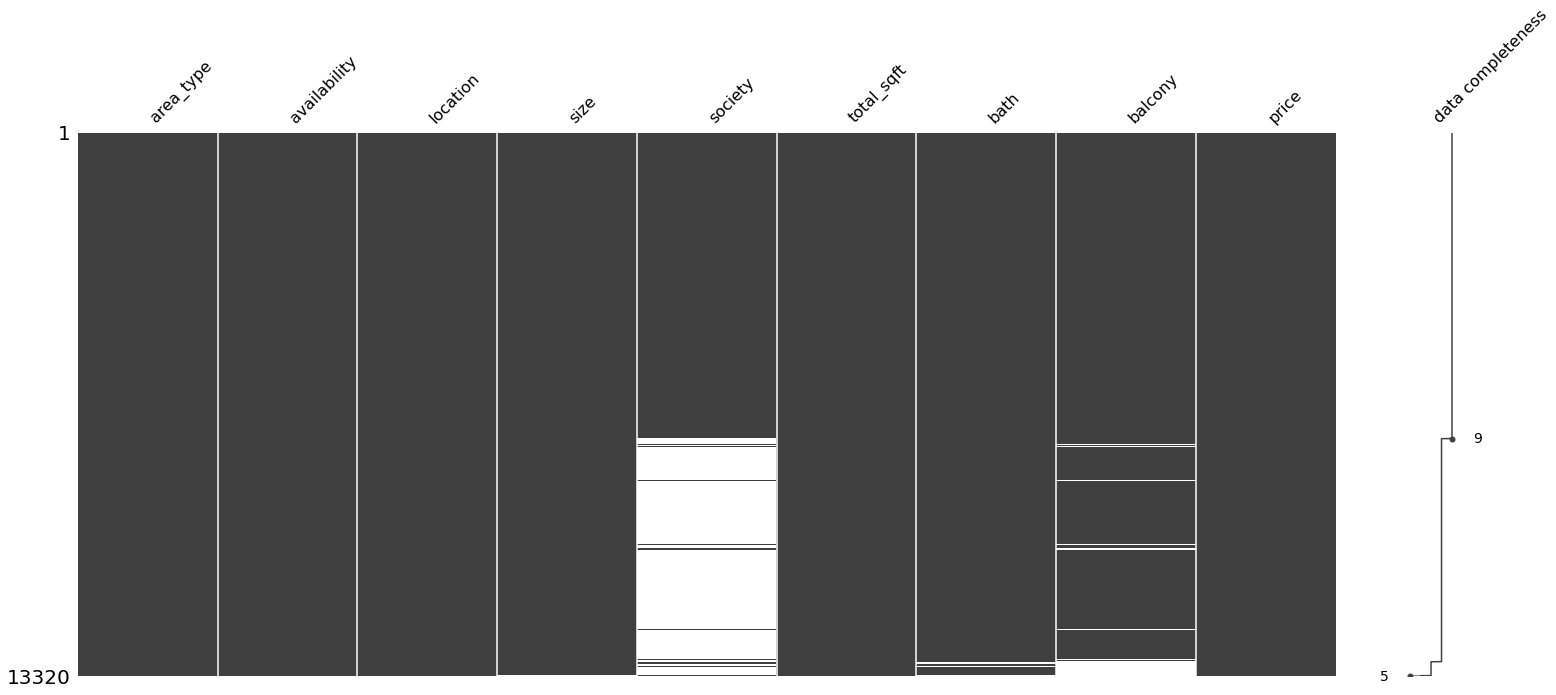

In [624]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending")

In [625]:
#we are dropping society column as society columns has more than 30% values missing
df1=df.drop(["society"],axis=1)

# Changing features

In [626]:
#extracting number from string
df1["bhk"]=df1["size"].apply(lambda x:float(str(x).split(" ")[0]))

In [627]:
df2=df1.drop("size",axis=1)

In [628]:
def month_finder(month):
    if month=="Ready To Move" or month=="Immediate Possession":
        return month
    else:
        return month[-3:]

In [629]:
# returning only month,ready to move and immediate possession from availability column
df2["available"]=df2.availability.apply(month_finder)

In [630]:
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,available
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,Dec
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,Ready To Move
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,Ready To Move
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,Ready To Move
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,Ready To Move


In [631]:
df2=df2.drop("availability",axis=1)

In [632]:
#checking if a datatype is float 
def float_check(f):
    try:
        float(f)
    except:
        return False
    return True
#Extracting string 
def string_extractor(s):
    r=re.compile("\D+")
    return("".join(r.findall(s)))
#Extracting number
def float_extractor(s):
    r=re.compile(r"\d+\.*\d*")
    return(float(r.findall(s)[0]))

#convertimg from other units to sq feet
def convertor(unit,string):
    if string in [".Sq. Meter","Sq. Meter"]:
        return(unit*10.7639)
    elif string in ["Sq. Yards",".Sq. Yards"]:
        return(unit*9)
    elif string in [".Acres","Acres"]:
        return(unit*43560)
    elif string in ["Cents"]:
        return(unit*435.56)
    elif string in ["Guntha"]:
        return(unit*1089)
    elif string=="Grounds":
        return unit*2400
    elif string=="Perch":
        return unit*272.25
    else:
        return None 
    
def float_extract1(n):
    if float_check(n)==True: #check if the datatype of a column is float
        return float(n)
    else:
        try:
            x=n.split("-") # for cases like '1705-1805'
            return (float(x[0])+float(x[1]))/2
        except:
            s,f=string_extractor(n),float_extractor(n) # for handling cases like 3.26 Guntha
            k=convertor(f,s)
            return k

In [633]:
df3=df2.copy()

In [634]:
#getting area by applying those functions
df3["Area"]=df3["total_sqft"].apply(float_extract1)

In [635]:
df3.isnull().sum()

area_type       0
location        1
total_sqft      0
bath           73
balcony       609
price           0
bhk            16
available       0
Area            0
dtype: int64

In [636]:
df3.head(5)

,area_type,location,total_sqft,bath,balcony,price,bhk,available,Area
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,Dec,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,Ready To Move,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0,Ready To Move,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,Ready To Move,1521.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0,Ready To Move,1200.0


In [637]:
df4=df3.drop(["total_sqft"],axis=1)

In [638]:
df4.head()

,area_type,location,bath,balcony,price,bhk,available,Area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,Dec,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,Ready To Move,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,Ready To Move,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,Ready To Move,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2.0,Ready To Move,1200.0


<AxesSubplot:>

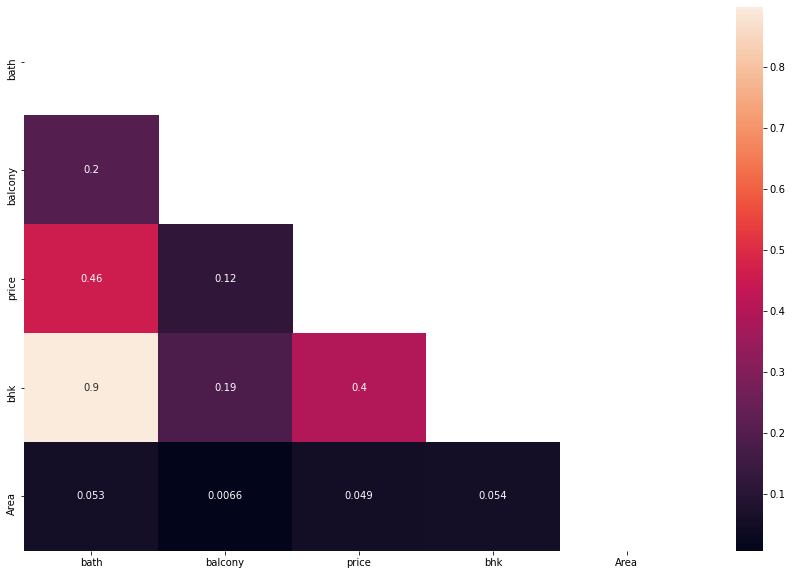

In [639]:
corr=df4.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask,annot=True)

In [640]:
#Since bhk and bath are having high correlation, we are dropping bath
df4=df4.drop("bath",axis=1)

In [641]:
df4["ppsft"]=(df4["price"]/df4["Area"])*100000

In [642]:
df4.head()

,area_type,location,balcony,price,bhk,available,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,Dec,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,Ready To Move,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,Ready To Move,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,Ready To Move,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,Ready To Move,1200.0,4250.000000


# Checking some features

In [643]:
df4.bhk.value_counts()

2.0     5528
3.0     4857
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
18.0       1
14.0       1
43.0       1
12.0       1
13.0       1
19.0       1
27.0       1
16.0       1
Name: bhk, dtype: int64

In [644]:
df4=df4[~(df4.bhk>=10)]

In [645]:
df4.balcony.value_counts()

2.0    5112
1.0    4897
3.0    1667
0.0    1024
Name: balcony, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

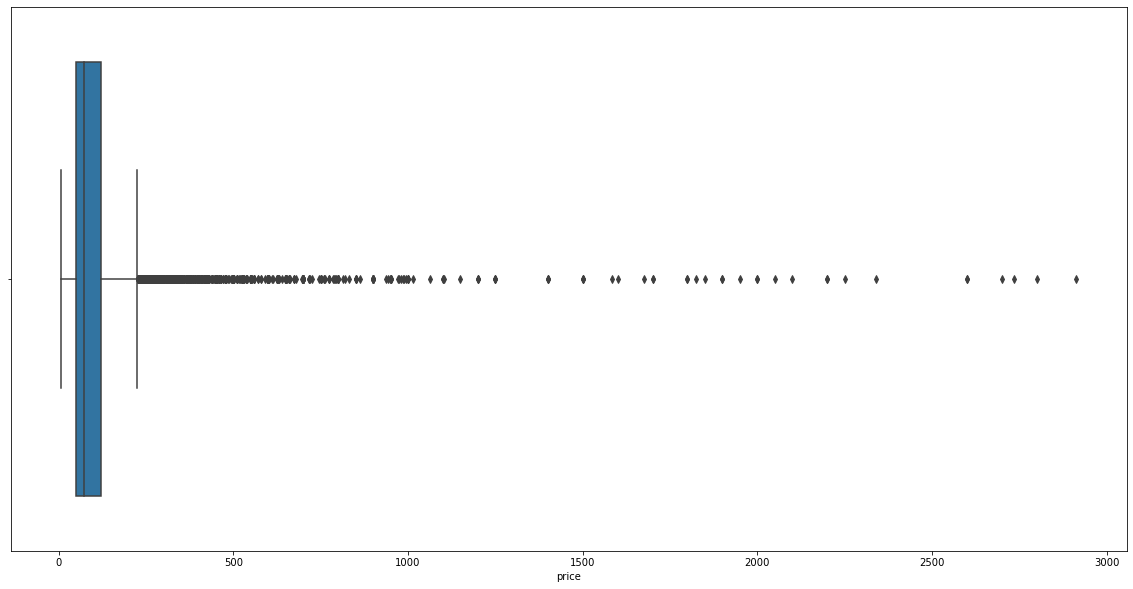

In [646]:
sns.boxplot(df4.price)

In [647]:
df4.price.describe()

count    13294.000000
mean       111.952320
std        145.603918
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       2912.000000
Name: price, dtype: float64

In [648]:
df4=df4[df4.price<=250]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

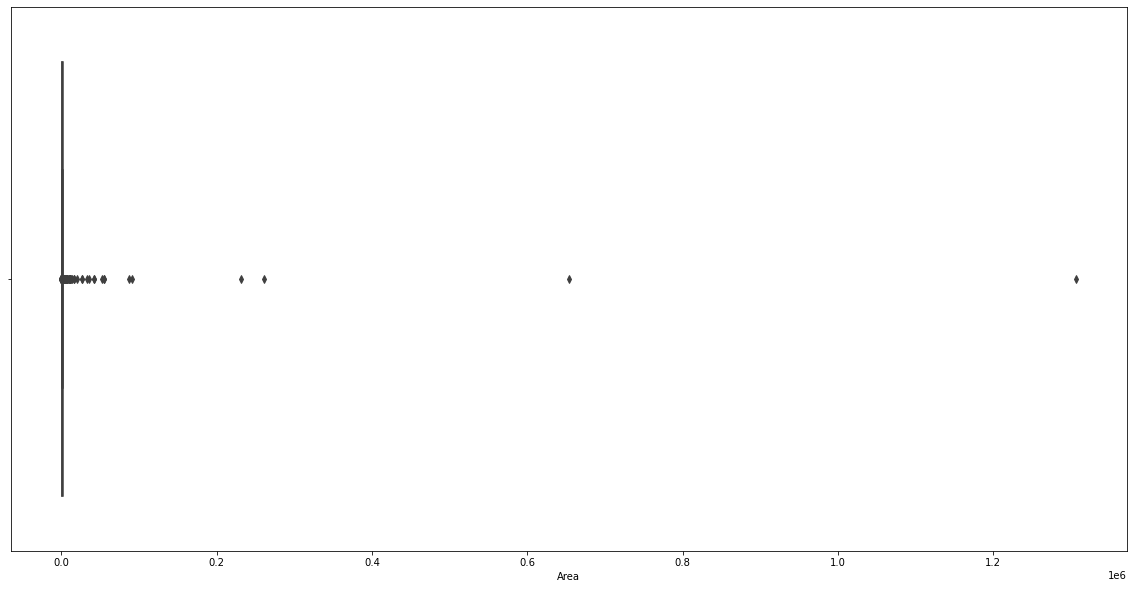

In [649]:
sns.boxplot(df4.Area)

<AxesSubplot:ylabel='Frequency'>

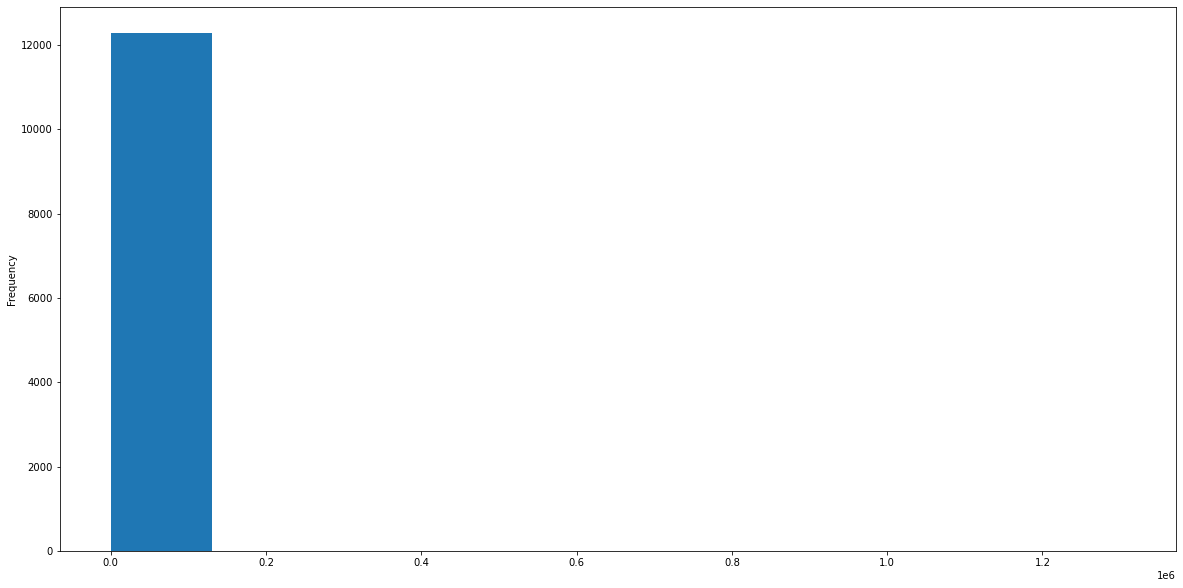

In [650]:
df4.Area.plot.hist()

In [651]:
df4=df4[df4.Area<=9000]

<AxesSubplot:ylabel='Frequency'>

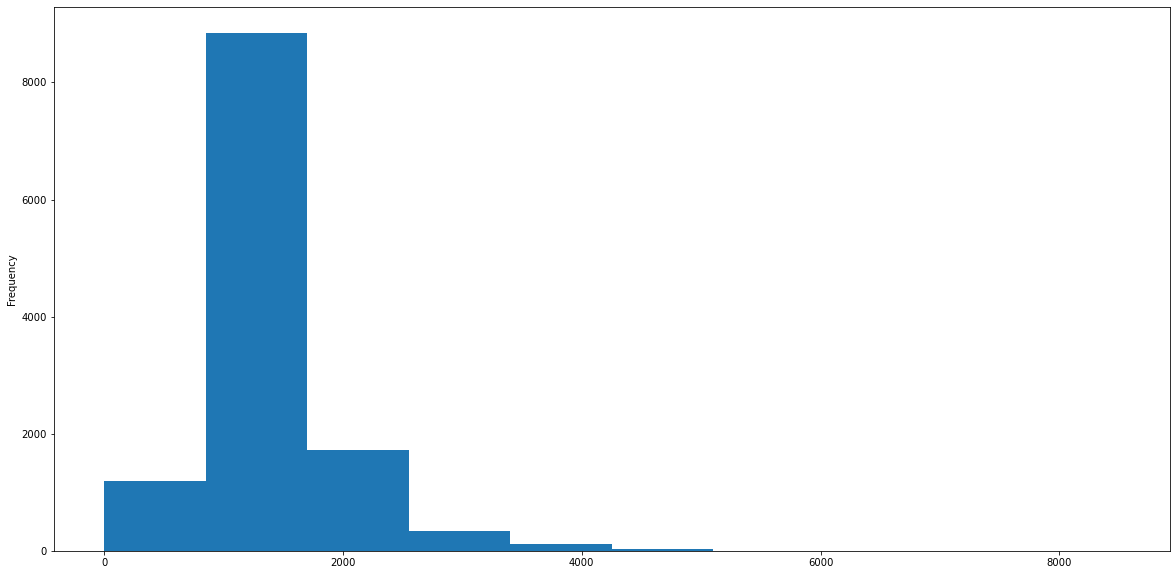

In [652]:
df4.Area.plot.hist()

In [653]:
df4.Area.describe()

count    12262.000000
mean      1382.671693
std        574.982972
min          1.000000
25%       1085.000000
50%       1245.000000
75%       1567.800000
max       8500.000000
Name: Area, dtype: float64

In [654]:
df4.shape

(12262, 8)

# Boxplots

In [655]:
df4.head()

,area_type,location,balcony,price,bhk,available,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,Dec,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,Ready To Move,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,Ready To Move,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,Ready To Move,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,Ready To Move,1200.0,4250.000000


In [656]:
def box(c):
    sns.boxplot(x=c,y="price",data=df4)

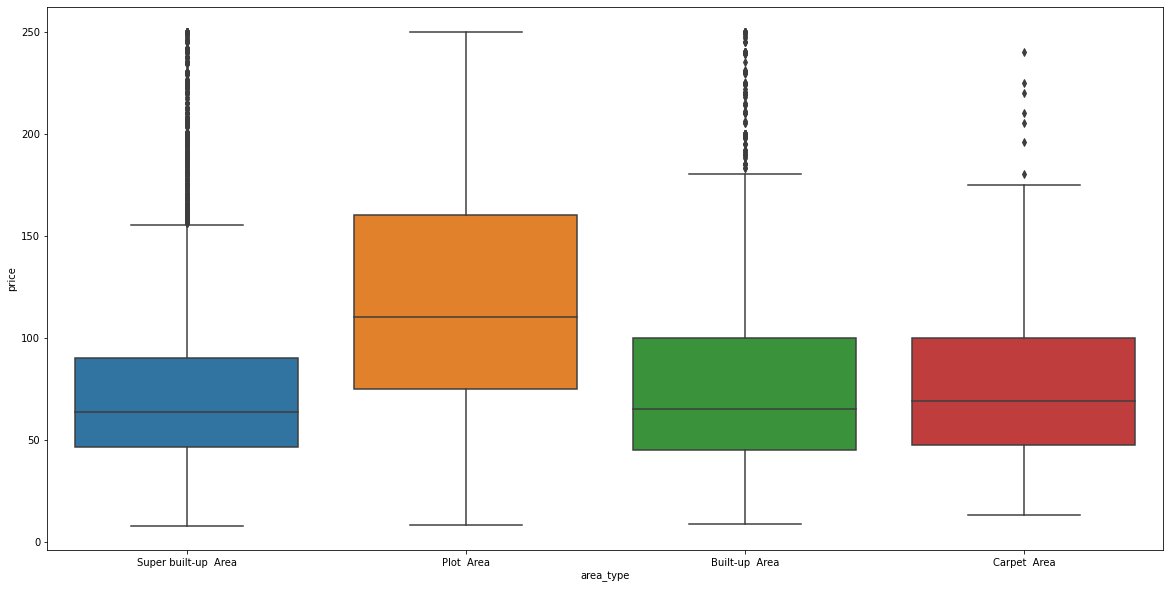

In [657]:
box("area_type")

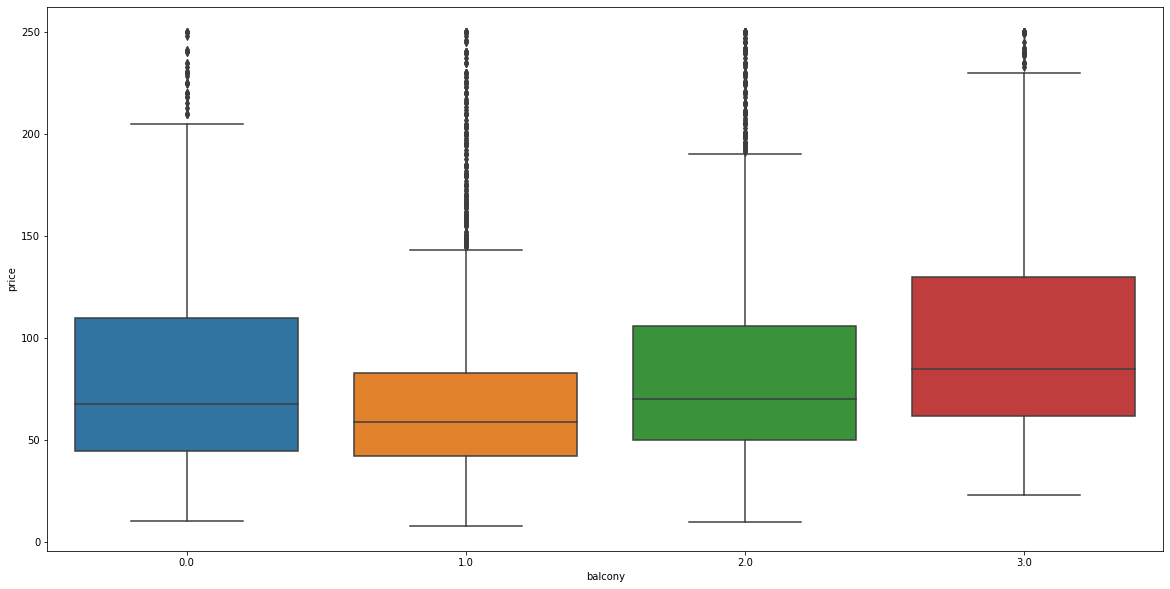

In [658]:
box("balcony")

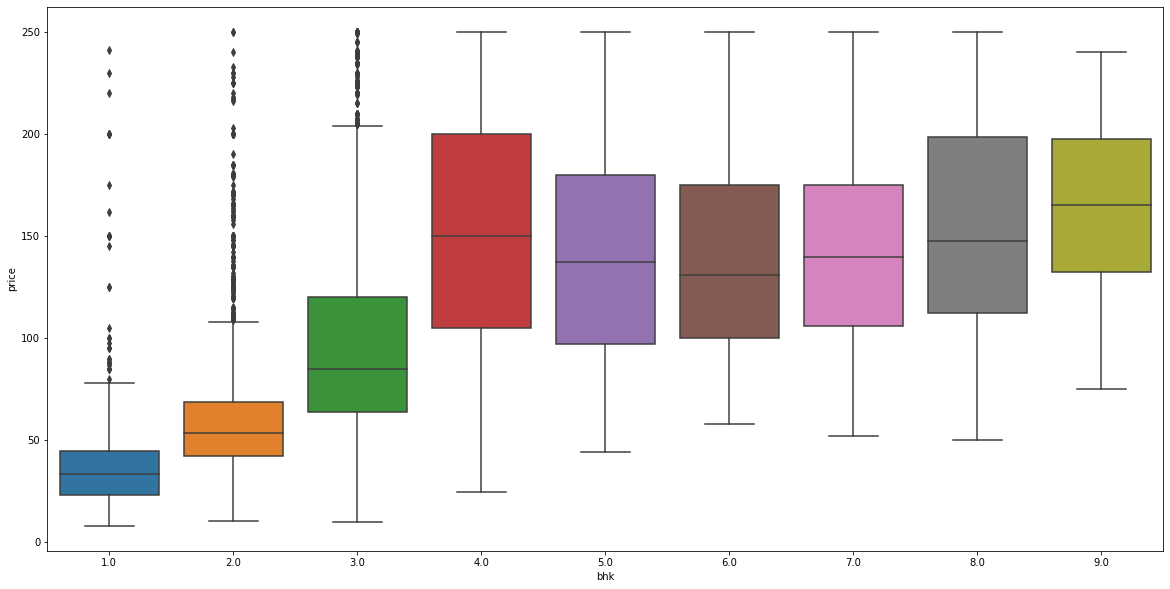

In [659]:
box("bhk")

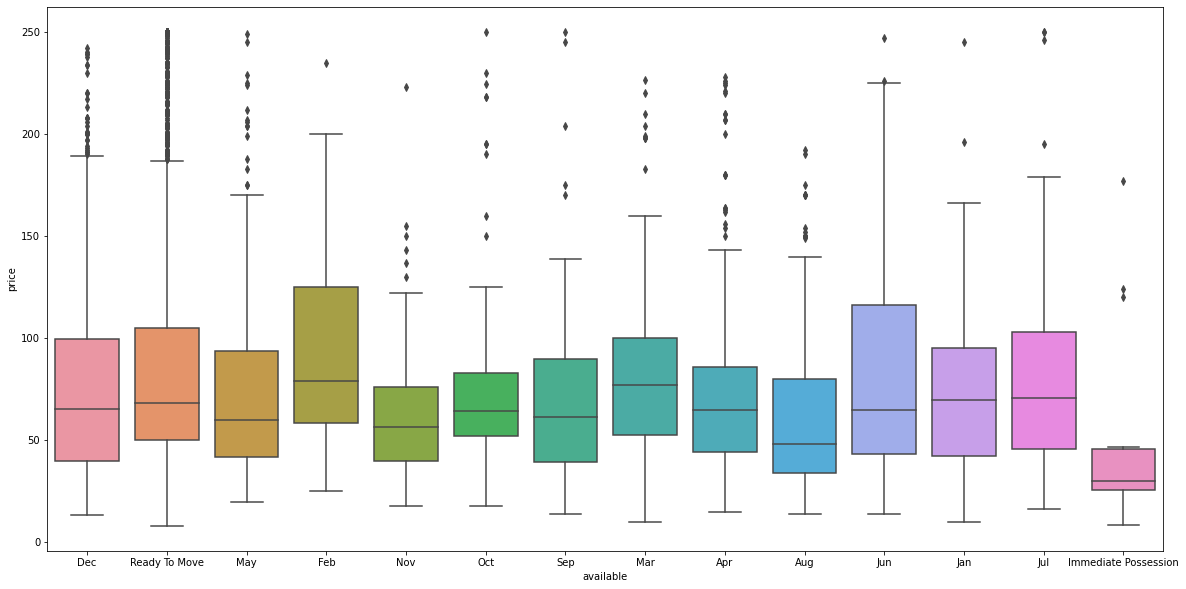

In [660]:
box("available")

# Linear Regression for Area vs Price

<AxesSubplot:xlabel='Area', ylabel='price'>

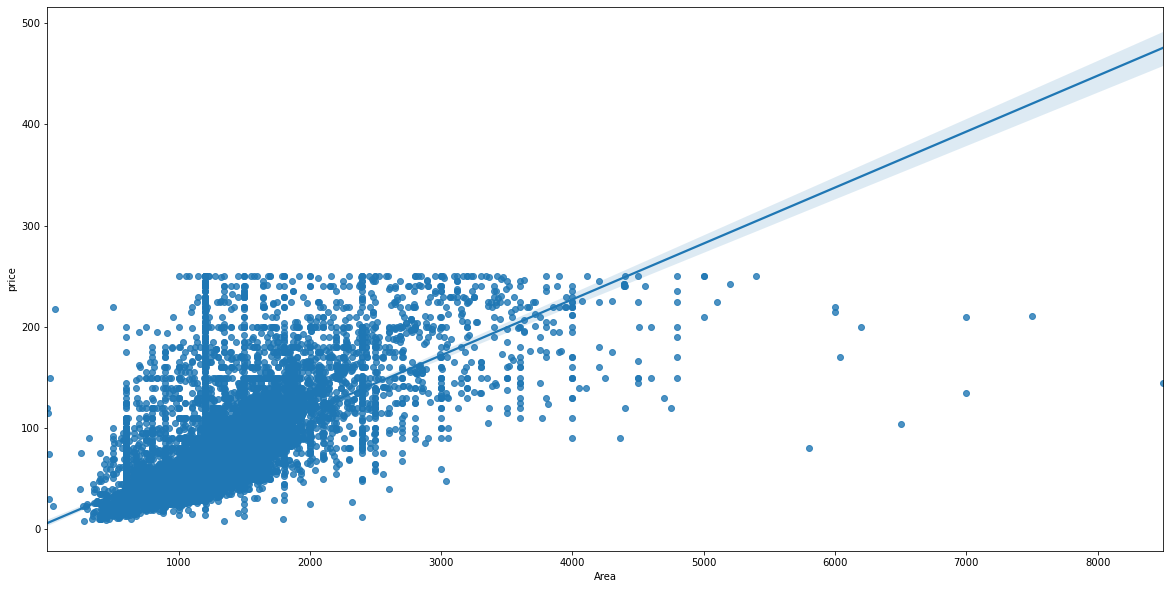

In [661]:
sns.regplot(x="Area",y="price",data=df4)

In [662]:
import statsmodels.api as sm
y=df4.price

In [663]:
def regression_results(x):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [664]:
regression_results(df4.Area)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     8948.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:46:43   Log-Likelihood:                -61739.
No. Observations:               12262   AIC:                         1.235e+05
Df Residuals:                   12260   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1635      0.875      7.046      0.0

# Tukey Test

In [665]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison

In [666]:
def tukeytest(col):
    mc=MultiComparison(df4["price"],df4[col])
    mcresult=mc.tukeyhsd(0.05)
    print(mcresult.summary())

In [667]:
df4.columns

Index(['area_type', 'location', 'balcony', 'price', 'bhk', 'available', 'Area',
       'ppsft'],
      dtype='object')

In [668]:
tuk=df4.columns[[0,5]]

In [669]:
for i in tuk:
    tukeytest(i)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1            group2        meandiff p-adj  lower    upper  reject
--------------------------------------------------------------------------
Built-up  Area         Carpet  Area   0.3343   0.9 -12.8474 13.5159  False
Built-up  Area           Plot  Area  41.2698 0.001  37.3361 45.2036   True
Built-up  Area Super built-up  Area  -5.7895 0.001   -8.626  -2.953   True
  Carpet  Area           Plot  Area  40.9356 0.001  27.6489 54.2222   True
  Carpet  Area Super built-up  Area  -6.1238 0.606 -19.1279  6.8804  False
    Plot  Area Super built-up  Area -47.0593 0.001 -50.3497 -43.769   True
--------------------------------------------------------------------------
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
    

In [670]:
df4.shape

(12262, 8)

In [671]:
#not much difference can be found out, so we are dropping the available column
df5=df4.drop("available",axis=1)

# Missing values

In [672]:
df5.isnull().sum()

area_type      0
location       1
balcony      411
price          0
bhk           14
Area           0
ppsft          0
dtype: int64

In [673]:
df5

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000
...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,1.0,57.00,3.0,1345.0,4237.918216
13314,Super built-up Area,Green Glen Layout,3.0,112.00,3.0,1715.0,6530.612245
13315,Built-up Area,Whitefield,0.0,231.00,5.0,3453.0,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1.0,60.00,2.0,1141.0,5258.545136


In [674]:
df5=df5.reset_index()
df5

,index,area_type,location,balcony,price,bhk,Area,ppsft
0,0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
12257,13313,Super built-up Area,Uttarahalli,1.0,57.00,3.0,1345.0,4237.918216
12258,13314,Super built-up Area,Green Glen Layout,3.0,112.00,3.0,1715.0,6530.612245
12259,13315,Built-up Area,Whitefield,0.0,231.00,5.0,3453.0,6689.834926
12260,13317,Built-up Area,Raja Rajeshwari Nagar,1.0,60.00,2.0,1141.0,5258.545136


In [675]:
df6=df5.drop(["index"],axis=1)

In [676]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.impute import KNNImputer

In [677]:
#imp_data=df6[["bath","balcony","bhk"]]

In [678]:
df7=df6.copy()

In [679]:
def prob_imputer(col):
    p=df6[col].value_counts(normalize=True)
    nos=df6[col].isna().sum()
    sample=np.random.choice(p.index,nos,p=p)
    s=[]
    k=0
    for i in range(df6.shape[0]):
        a=df6.iloc[i,:][col]
        if str(a)=="nan":
            s.append(sample[k])
            k+=1
        else:
            s.append(a)
    df7[col]=pd.Series(s)
        

In [680]:
df6.isnull().sum()

area_type      0
location       1
balcony      411
price          0
bhk           14
Area           0
ppsft          0
dtype: int64

In [681]:
prob_imputer("balcony")

In [682]:
df7.head()

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000


In [683]:
prob_imputer("bhk")

In [684]:
df7.head()

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000


In [685]:
df7.isna().sum()

area_type    0
location     1
balcony      0
price        0
bhk          0
Area         0
ppsft        0
dtype: int64

In [686]:
df7=df7.dropna()
df7.shape

(12261, 7)

# Location

In [687]:
df7a=df7.copy()

In [688]:
df7['location'] = df7['location'].apply(lambda x: str(x).strip())

In [689]:
location_count=df7.location.value_counts()
location_count_10 = location_count[location_count < 4]
df7['location'] = df7['location'].apply(lambda x: 'other' if x in location_count_10 else x)

In [690]:
df7.location.value_counts()

other                         1143
Whitefield                     474
Sarjapur  Road                 367
Electronic City                303
Kanakpura Road                 271
                              ... 
Alfa Garden Layout               4
RWF West Colony                  4
Sai Gardens                      4
Ramamurthy Nagar Extension       4
New Gurappana Palya              4
Name: location, Length: 477, dtype: int64

In [691]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12261 entries, 0 to 12261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12261 non-null  object 
 1   location   12261 non-null  object 
 2   balcony    12261 non-null  float64
 3   price      12261 non-null  float64
 4   bhk        12261 non-null  float64
 5   Area       12261 non-null  float64
 6   ppsft      12261 non-null  float64
dtypes: float64(5), object(2)
memory usage: 670.5+ KB


# Visualizing price of flats in one location


In [692]:
df7.location.value_counts()

other                         1143
Whitefield                     474
Sarjapur  Road                 367
Electronic City                303
Kanakpura Road                 271
                              ... 
Alfa Garden Layout               4
RWF West Colony                  4
Sai Gardens                      4
Ramamurthy Nagar Extension       4
New Gurappana Palya              4
Name: location, Length: 477, dtype: int64

In [693]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [694]:
df7.shape

(12261, 7)

In [695]:
def rmv_outlierBy_std():
    out_df = pd.DataFrame()
    for i in df.location.unique():
        subdf=df7[df7.location==i]
        mean = subdf.ppsft.mean()
        std = subdf.ppsft.std()
        reduced_df = subdf[(subdf.ppsft > (mean - std)) & (subdf.ppsft < (mean + std))]
        out_df = out_df.append(reduced_df, ignore_index = True)
    return out_df

df8= rmv_outlierBy_std()

In [696]:
df8.shape

(8893, 7)

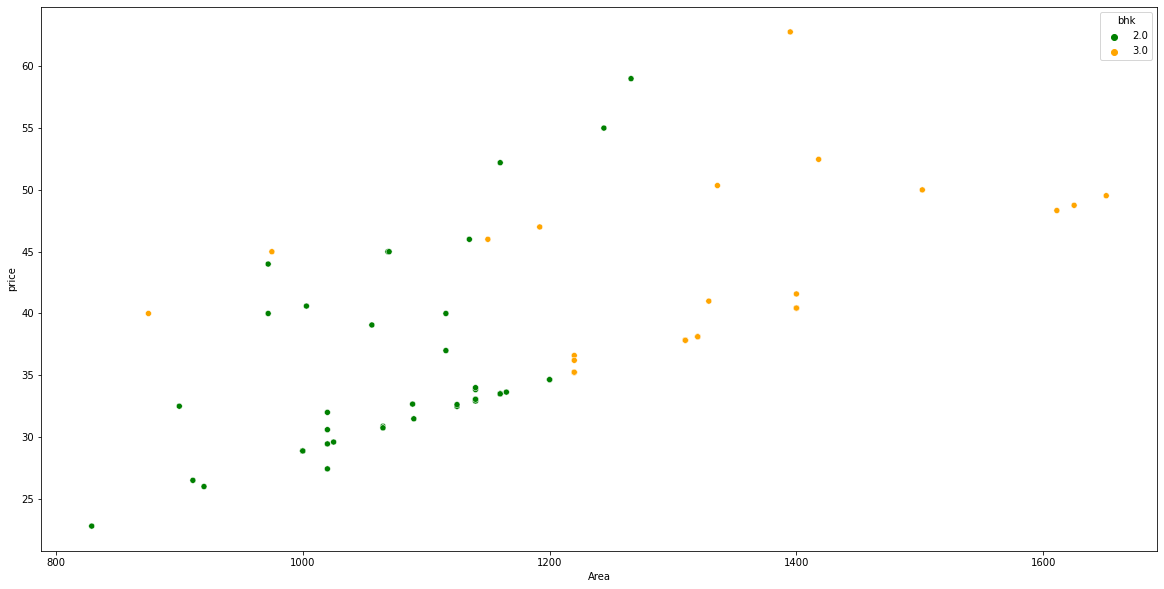

In [697]:
visualize("Electronic City Phase II",2,3,df8)

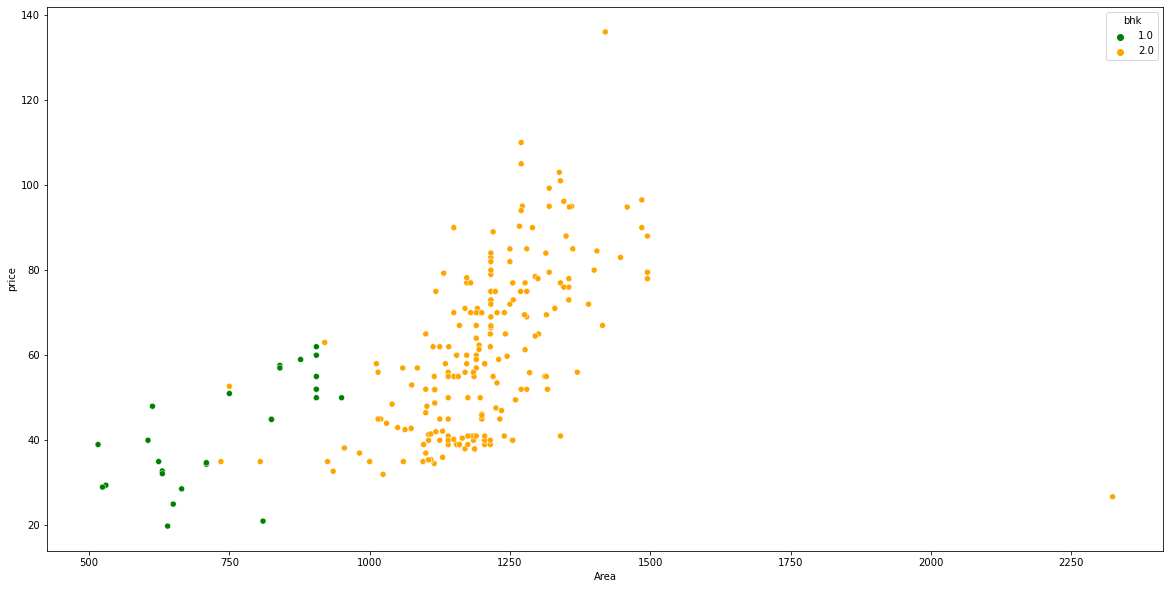

In [698]:
visualize("Whitefield",1,2,df8)

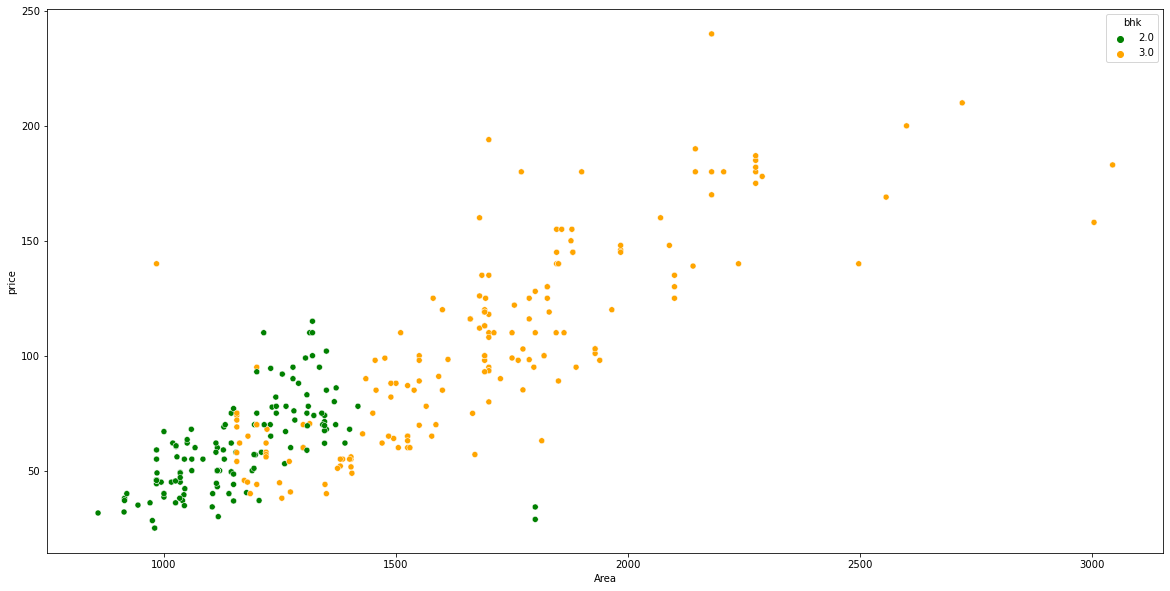

In [699]:
visualize("Sarjapur  Road",2,3,df8)

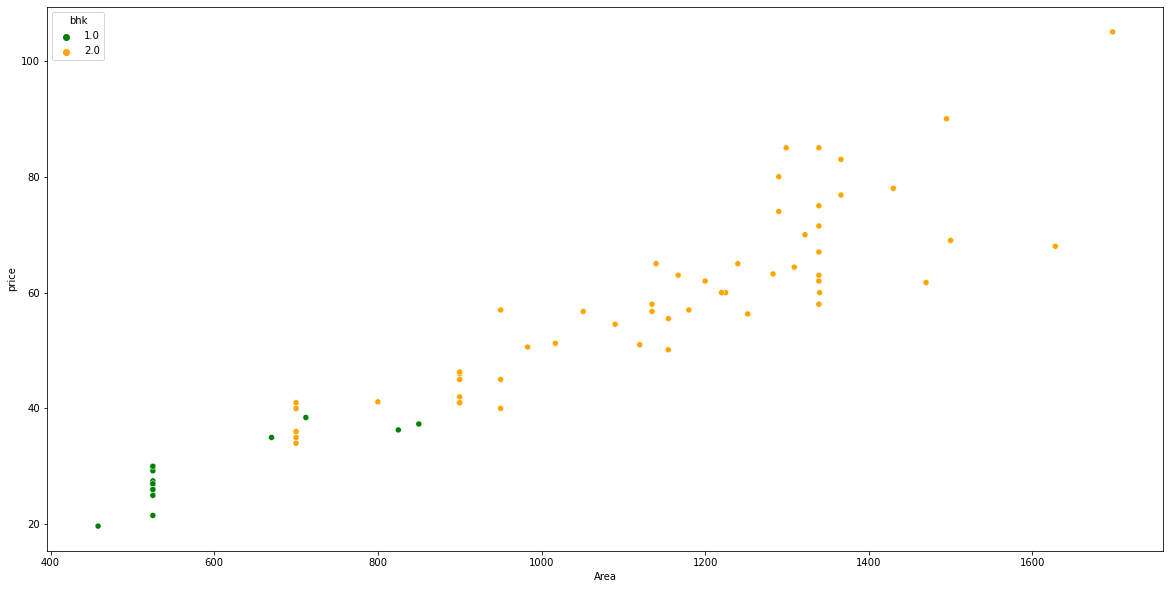

In [700]:
visualize("Kanakpura Road",1,2,df8)

In [701]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df8.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsft),
                'std': np.std(bhk_df.ppsft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>6:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)

In [702]:
df9.shape

(7146, 7)

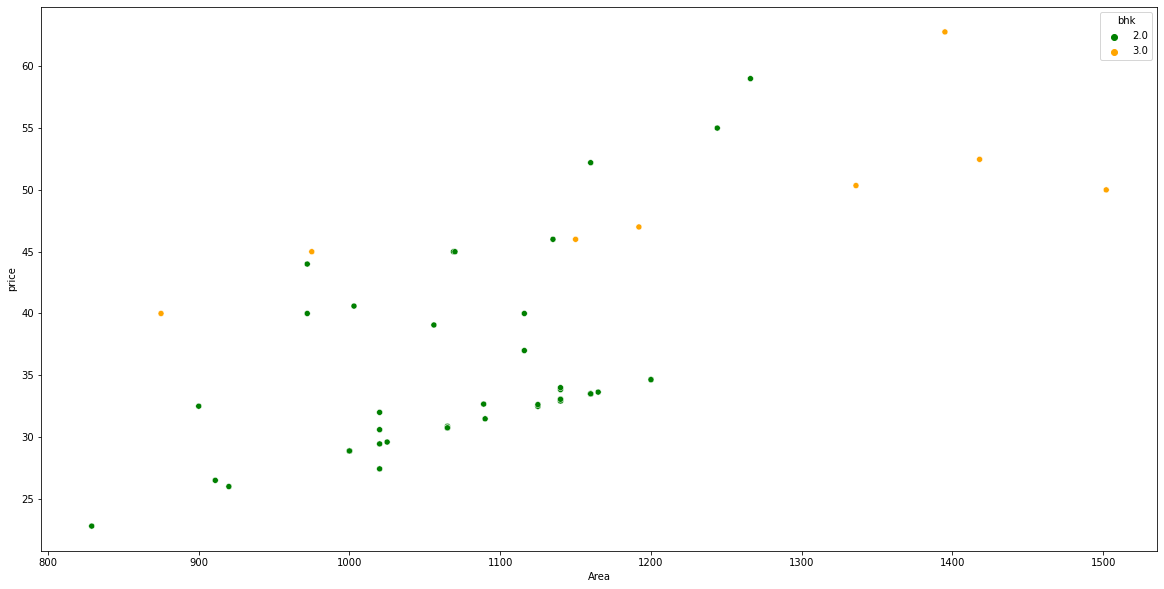

In [703]:
visualize("Electronic City Phase II",2,3,df9)

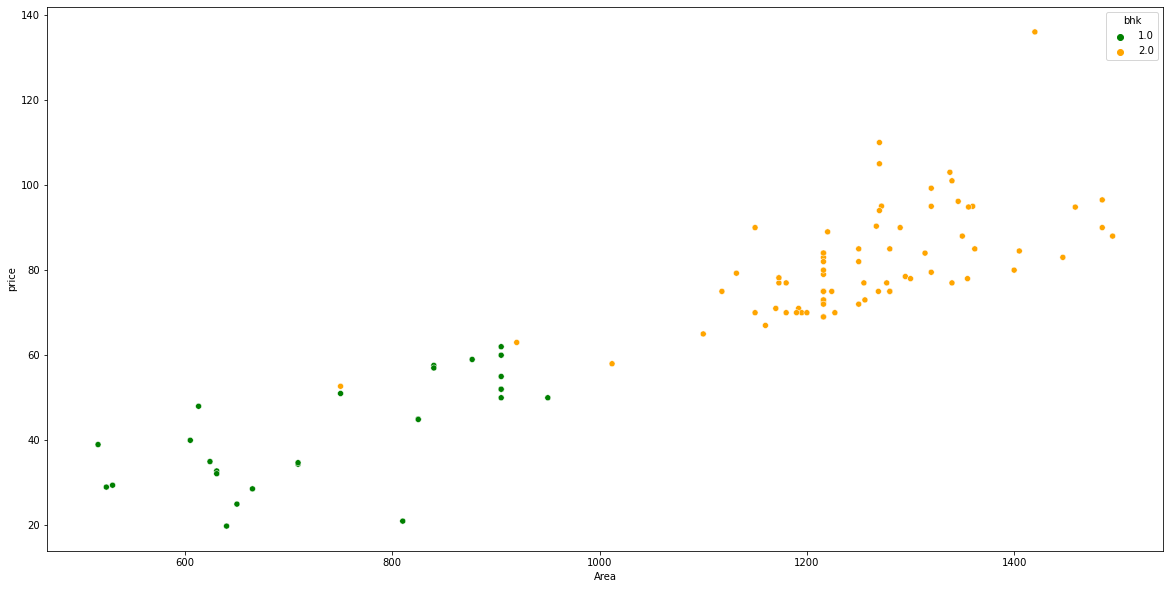

In [704]:
visualize("Whitefield",1,2,df9)

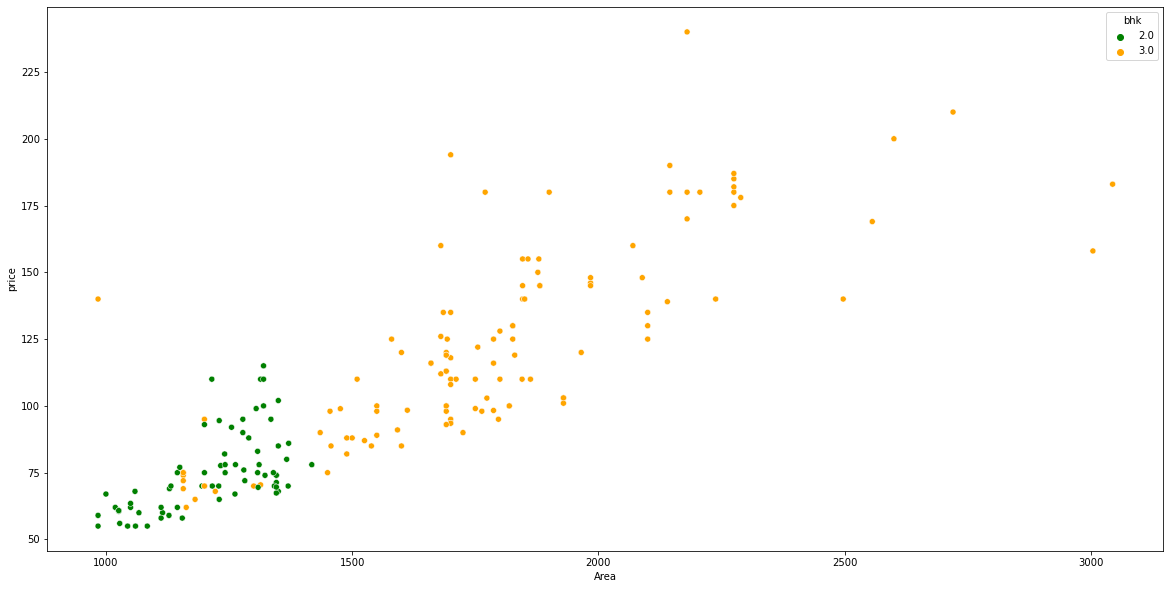

In [705]:
visualize("Sarjapur  Road",2,3,df9)

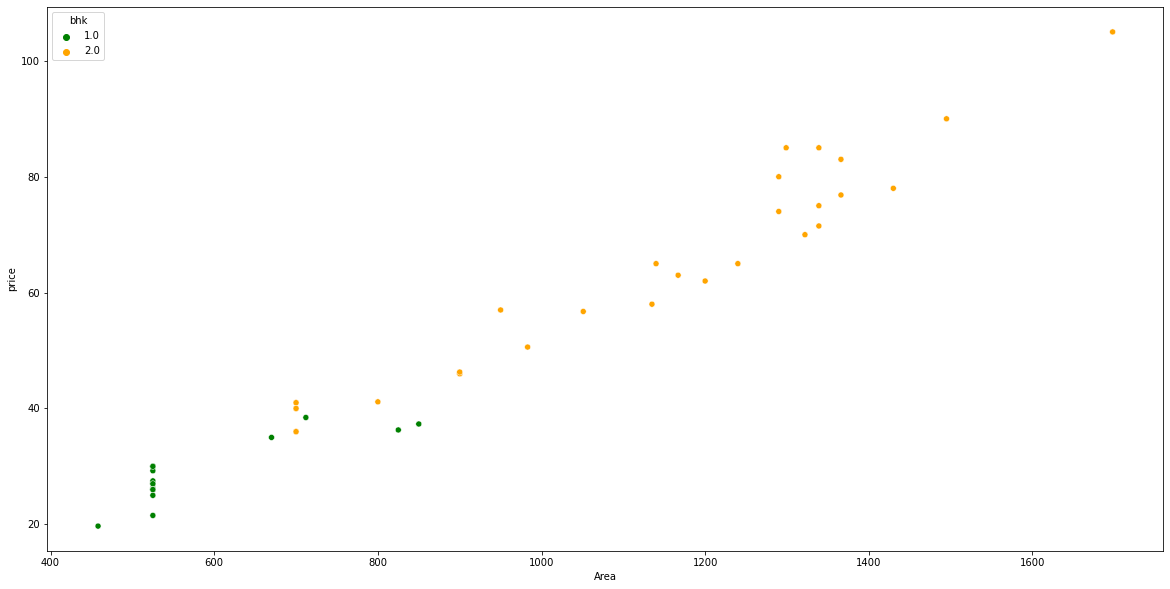

In [706]:
visualize("Kanakpura Road",1,2,df9)

# Modelling

In [707]:
df9.head()

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Super built-up Area,Electronic City Phase II,1.0,30.60,2.0,1020.0,3000.000000
2,Super built-up Area,Electronic City Phase II,2.0,45.00,2.0,1069.0,4209.541628
3,Super built-up Area,Electronic City Phase II,1.0,28.35,1.0,630.0,4500.000000
5,Super built-up Area,Electronic City Phase II,0.0,98.88,4.0,2225.0,4444.044944


In [708]:
df9=df9.drop("ppsft",axis=1)

In [709]:
cat=df9[["area_type","location"]]

In [710]:
c=pd.get_dummies(cat,drop_first=True)

In [711]:
c

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Block Hrbr Layout,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_tc.palya
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8889,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [712]:
df10=df9.drop(["area_type","location"],axis=1)

In [713]:
df10=pd.concat([df10,c],axis=1)

In [714]:
df10

,balcony,price,bhk,Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_tc.palya
0,1.0,39.07,2.0,1056.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,30.60,2.0,1020.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,45.00,2.0,1069.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,28.35,1.0,630.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,98.88,4.0,2225.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,1.0,70.00,2.0,1100.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8889,2.0,150.00,3.0,1672.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8890,3.0,149.00,3.0,1750.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8891,2.0,150.00,3.0,1750.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [715]:
from sklearn.preprocessing import MinMaxScaler

In [716]:
X=df10.drop("price",axis=1)
y=df10.price

In [717]:
X_scaled=MinMaxScaler().fit_transform(X)
X_scaled

array([[0.33333333, 0.125     , 0.13505948, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.125     , 0.12876137, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.125     , 0.1373338 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.25      , 0.25647306, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.25      , 0.25647306, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.25      , 0.25437369, ..., 0.        , 0.        ,
        0.        ]])

In [718]:
X.shape

(7146, 476)

In [719]:
y

0        39.07
1        30.60
2        45.00
3        28.35
5        98.88
         ...  
8888     70.00
8889    150.00
8890    149.00
8891    150.00
8892    110.00
Name: price, Length: 7146, dtype: float64

In [720]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [721]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [722]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))

0.8214347614487598


In [723]:
y_pred=lr.predict(X_test)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

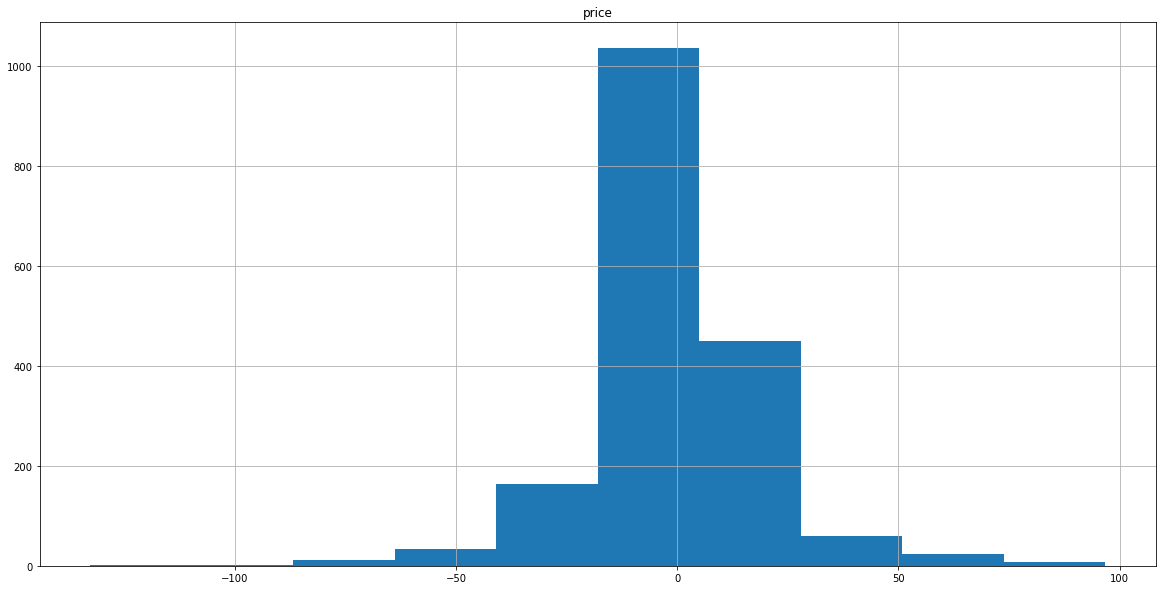

In [724]:
er=y_test-y_pred
e=pd.DataFrame(er)
e.hist()

In [726]:
max(er)

96.70554220947635

In [727]:
#Normality check of residuals
from scipy.stats import shapiro
stat, p = shapiro(e.price)
print(stat,p)

from scipy.stats import normaltest
stat, p = normaltest(e.price)
print(stat,p)

0.9126182794570923 6.855040127724191e-31
214.45143744241182 2.706836607385115e-47


In [728]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [729]:
cv = KFold(n_splits=20, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, scoring='r2',
                         cv=cv, n_jobs=-1)

In [730]:
scores

array([0.83956118, 0.85650534, 0.86850598, 0.83811288, 0.82912496,
       0.8391686 , 0.84932542, 0.8316276 , 0.84062025, 0.82544412,
       0.84348494, 0.82644044, 0.87319057, 0.76851774, 0.81352794,
       0.84134859, 0.81373031, 0.8678145 , 0.83628326, 0.83495193])

In [731]:
scores.mean()

0.8368643279111156

In [735]:
cv = KFold(n_splits=20, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, scoring='r2',
                         cv=cv, n_jobs=-1)

In [736]:
scores

array([0.83956118, 0.85650534, 0.86850598, 0.83811288, 0.82912496,
       0.8391686 , 0.84932542, 0.8316276 , 0.84062025, 0.82544412,
       0.84348494, 0.82644044, 0.87319057, 0.76851774, 0.81352794,
       0.84134859, 0.81373031, 0.8678145 , 0.83628326, 0.83495193])

In [737]:
scores.mean()

0.8368643279111156

# Checking p values of features

In [741]:
import statsmodels.api as sm
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [746]:
X_s=pd.DataFrame(X_scaled,columns=X.columns,index=X.index)

In [747]:
regression_results(X_s,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     89.79
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:10:54   Log-Likelihood:                -30216.
No. Observations:                7146   AIC:                         6.139e+04
Df Residuals:                    6669   BIC:                         6.467e+04
Df Model:                         476                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Ridge and Lasso Regression

In [748]:
from sklearn import linear_model

In [760]:
a=np.linspace(0.2,1,5)
a

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [761]:
s_r=[]
s_l=[]
for i in a:
    ridge=linear_model.Ridge(alpha=i)
    lasso=linear_model.Lasso(alpha=i)
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    s1=ridge.score(X_test,y_test)
    s2=lasso.score(X_test,y_test)
    s_r.append(s1)
    s_l.append(s2)

In [762]:
s_r

[0.8270418938702263,
 0.8282049888723627,
 0.8283217690003499,
 0.8278693678857398,
 0.8270913268928711]

In [763]:
s_l

[0.678101812688819,
 0.6525526331197314,
 0.6474670372788223,
 0.6431337384146134,
 0.6381613359333003]

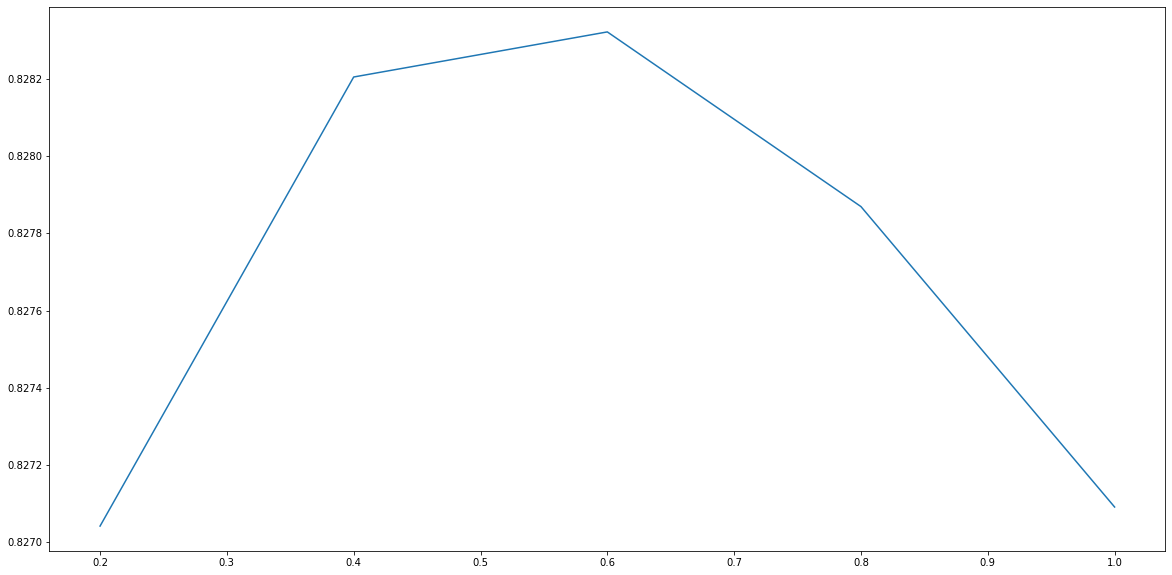

In [799]:
plt.plot(a,s_r)

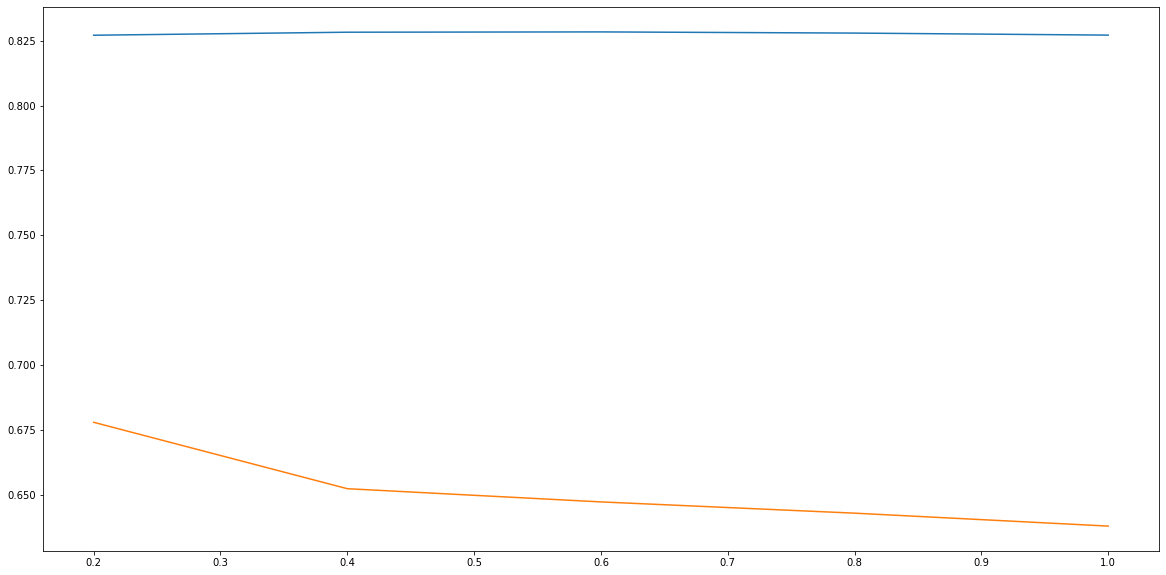

In [764]:
plt.plot(a,s_r)
plt.plot(a,s_l)

# AdaBoostRegressor

In [796]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
lr=LinearRegression()
dt=DecisionTreeRegressor()
rscore=[]
for i in range(1,50):
    reg_ada=AdaBoostRegressor(base_estimator=dt,n_estimators=i)
    reg_ada.fit(X_train,y_train)
    y_pred=reg_ada.predict(X_test)
    rscore.append(r2_score(y_test,y_pred))

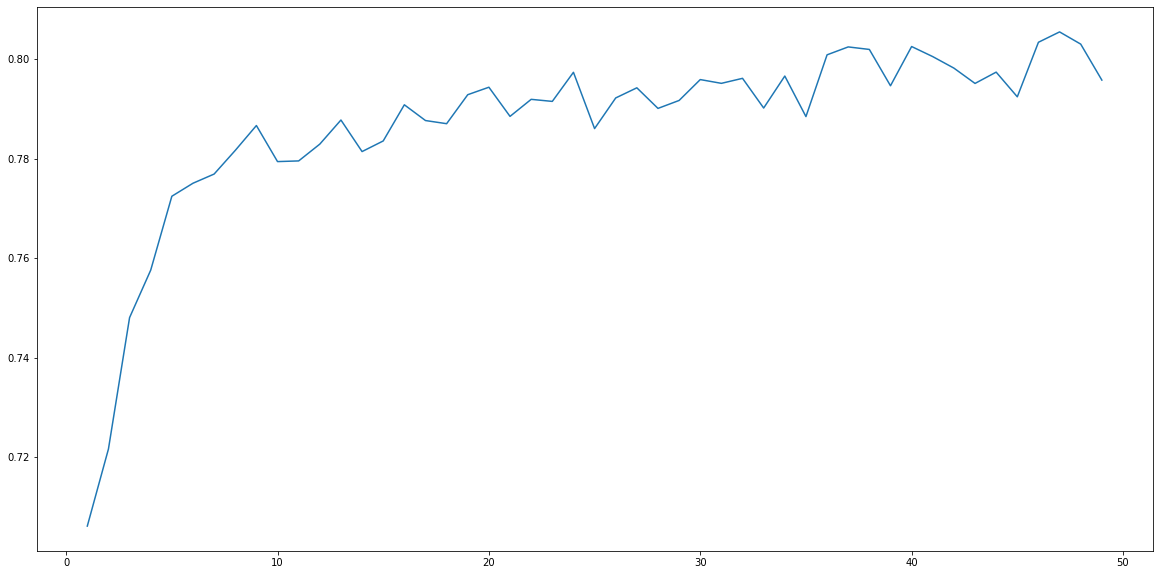

In [797]:
plt.plot(range(1,50),rscore)

In [798]:
rscore

[0.7061263094927475,
 0.7216262588652769,
 0.7480676579858976,
 0.7576194959305691,
 0.7724837105880932,
 0.7751010836602747,
 0.7769485340449992,
 0.7817042561503984,
 0.7867082428396939,
 0.779454795597612,
 0.7795910958040353,
 0.7829708693938082,
 0.7878180440728078,
 0.781470834045433,
 0.783607981248791,
 0.790882582620239,
 0.787713541837752,
 0.7870799837924588,
 0.79291303458804,
 0.7944169785824063,
 0.7885510529065068,
 0.7919790509138952,
 0.7915647896483051,
 0.7974206606404713,
 0.7860988396426685,
 0.7922596264282962,
 0.794298730761971,
 0.7901568818485026,
 0.7917557977667804,
 0.795954579402924,
 0.7951975813758769,
 0.7962045163474106,
 0.7902323981669632,
 0.7966652207414822,
 0.7885096052250213,
 0.8009338037604776,
 0.8025249787742422,
 0.8020186275716725,
 0.7947091260621608,
 0.8026025338669309,
 0.8005737131844797,
 0.7982616295584892,
 0.795180061296163,
 0.7974521923010128,
 0.792486372558685,
 0.8034600594348351,
 0.8055446504455883,
 0.8030881115697787,
 0.

In [804]:
a=np.linspace(0.01,0.8,10)
s_r=[]
for i in a:
    ridge=linear_model.Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    s1=ridge.score(X_test,y_test)
    s_r.append(s1)

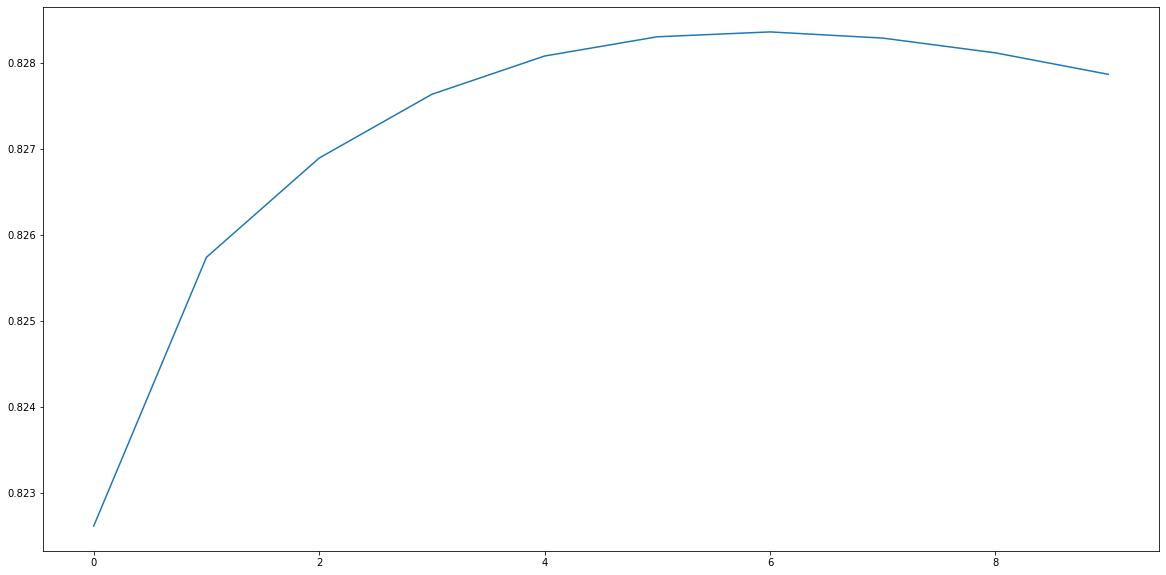

In [805]:
plt.plot(s_r)

In [806]:
a

array([0.01      , 0.09777778, 0.18555556, 0.27333333, 0.36111111,
       0.44888889, 0.53666667, 0.62444444, 0.71222222, 0.8       ])

In [807]:
s_r

[0.8226154258299173,
 0.8257411757656101,
 0.8268953179755874,
 0.8276370478740788,
 0.8280820676751479,
 0.8283060616989066,
 0.8283626028347775,
 0.8282906290905621,
 0.8281189822208543,
 0.8278693678857398]